# Exercise 1

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

In [6]:
# data input
datapath = "Data/"
csvname = datapath + 'breast_cancer_data.csv'
data1 = np.loadtxt(csvname,delimiter = ',')
# get input and output of dataset
x = data1[:-1,:]
y = data1[-1:,:]


In [7]:
w = np.random.randn(9,1)

In [8]:
# import automatic differentiator to compute gradient module
import autograd.numpy as np
from autograd import grad
# gradient descent function - inputs: g (input function), alpha (steplength parameter), max_its (maximum number of iterations), w (initialization)
# max_its (maximum number of iterations), w (initialization)
def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w]     # container for weight history
    cost_history = [g(w)]    # container for corresponding cost function history
    for k in range(max_its):
        # evaluate the gradient, store current weights and cost function value
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval

        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history

### 1.1

In [9]:
# compute linear combination of input points
def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T

# an implementation of the softmax cost
def softmax(w):    
    # compute the least squares cost
    cost = np.sum(np.log(1 + np.exp(-y*model(x,w))))
    return cost/float(np.size(y))

# an implementation of the perceptron cost
def perceptron(w):
    P = y.shape[1]
    cost = np.sum(np.maximum(np.zeros(y.shape),-y*model(x,w)))
    return cost/float(P)

### 1.2

In [10]:
max_its = 1000
w = 0.1*np.random.randn(9,1)
#Perceptron
perceptron_w_history,perceptron_cost_history=gradient_descent(perceptron,0.1,max_its,w)
#Softmax
softmax_w_history,softmax_cost_history=gradient_descent(softmax,1.0,max_its,w)

### 1.3

In [11]:
### miscounts ###
def miscount(w,x,y):
    predictions = model(x,w)>0 #Classify predictions based on whether greater than 0
    incorrect_predictions = predictions!= (y==1) #Find predictions that don't match truth
    return np.sum(incorrect_predictions) #Sum no. of incorrect predictions

#Perceptron miscount
perceptron_miscount_history = [miscount(v,x,y) for v in perceptron_w_history]

#Softmax miscount
softmax_miscount_history = [miscount(v,x,y) for v in softmax_w_history]

### 1.4

In [12]:
#Create data for dataframe
cost_histories=np.append(perceptron_cost_history,softmax_cost_history)
iter_no=[i for i in range(len(softmax_cost_history))]*2
function_type=np.repeat(['Perceptron','Softmax'],len(softmax_cost_history))
miscounts=np.append(perceptron_miscount_history,softmax_miscount_history)

#Build dataframe to help plot w/ seaborn
cost_history_df=pd.DataFrame([cost_histories,function_type,iter_no,miscounts]).T
cost_history_df.columns=['Cost Function Value','Function','Iteration no.','Miscounts']
cost_history_df["Cost Function Value"]=pd.to_numeric(cost_history_df["Cost Function Value"], downcast="float")
cost_history_df["Iteration no."]=pd.to_numeric(cost_history_df["Iteration no."], downcast="float")
cost_history_df["Miscounts"]=pd.to_numeric(cost_history_df["Miscounts"], downcast="float")


In [13]:
%matplotlib inline
sns.set(rc = {'figure.figsize':(15,8)}) #Seaborn settings for plotting
sns.set_style("darkgrid")

<AxesSubplot:xlabel='Iteration no.', ylabel='Cost Function Value'>

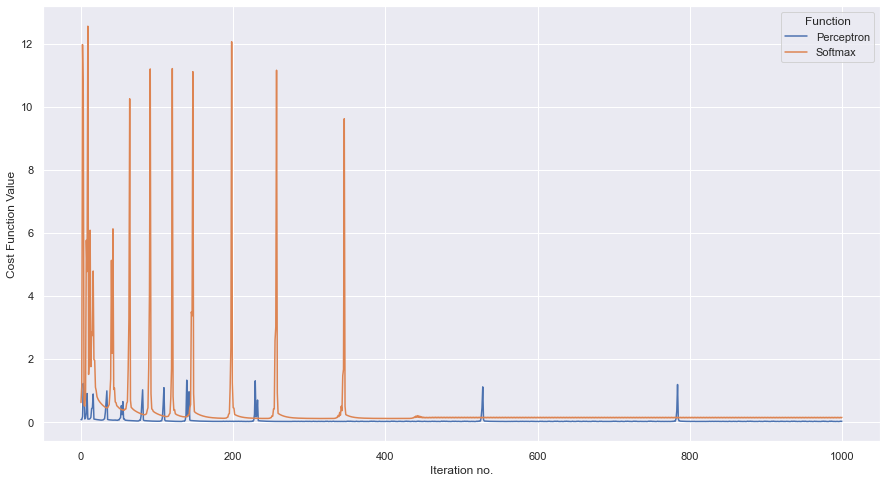

In [14]:
sns.lineplot(data=cost_history_df, x="Iteration no.", y="Cost Function Value", hue="Function")

The above plot shows the cost function at each iteration of gradient descent for both the perceptron and softmax functions. The cost function of the perceptron function seems to be lower than the softmax function, however the perceptron function sees spikes near iterations 380, 580 and 820.  

<AxesSubplot:xlabel='Iteration no.', ylabel='Miscounts'>

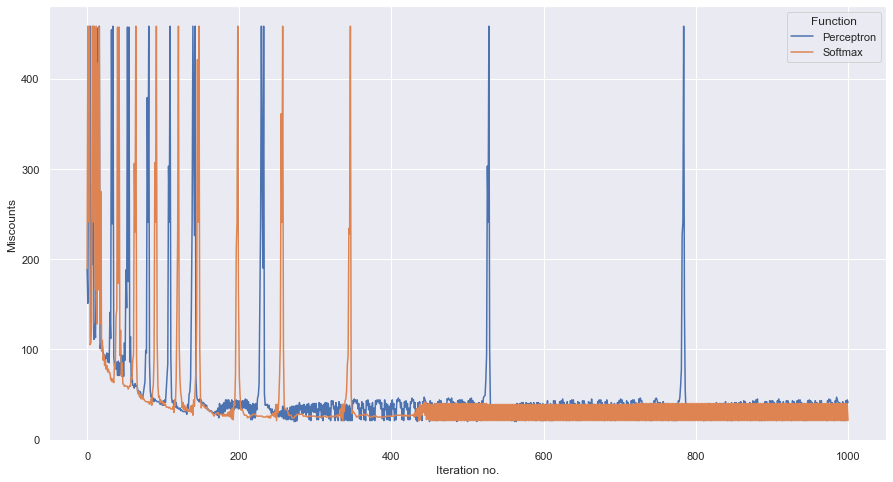

In [15]:
sns.lineplot(data=cost_history_df, x="Iteration no.", y="Miscounts", hue="Function")

The above plot shows the number of miscounts at each iteration of gradient descent for both the perceptron and softmax functions. Overall, the perceptron and softmax functions seem to have similar numbers of miscounts and similar overall performance. The perceptron function also has spikes in miscounts that match the spike in cost function seen in the earlier cost function plot.

### 1.5

In [16]:
a=np.argwhere(y>0.9)
b=np.argwhere(y<-0.9)
yc=np.arange(699)
yc[a]=1
yc[b]=0

In [17]:
# define sigmoid function
def sigmoid(t):
    return 1/(1 + np.exp(-t))

# the convex cross-entropy cost function
lam = 2*10**(-3)
def cross_entropy(w):
    # compute sigmoid of model
    a = sigmoid(model(x,w))

    # compute cost of label 0 points
    ind = np.argwhere(yc == 0)
    cost = -np.sum(np.log(1 - a[:,ind]))

    # add cost on label 1 points
    ind = np.argwhere(yc==1)
    cost -= np.sum(np.log(a[:,ind]))

    # add regularizer
    cost += lam*np.sum(w[1:]**2)

    # compute cross-entropy
    return cost/float(np.size(yc))

In [18]:
### miscounts with a different threshold for logistic regression ###
def miscount(w,x,y,threshold):
    predictions = model(x,w)>threshold
    incorrect_predictions = predictions!= (y==1)
    return np.sum(incorrect_predictions)

In [19]:

#Fit model
w = np.random.randn(9,1)
CE_w_history,CE_cost_history=gradient_descent(cross_entropy,0.6,max_its,w)

[Text(0, 0.5, 'Cost function')]

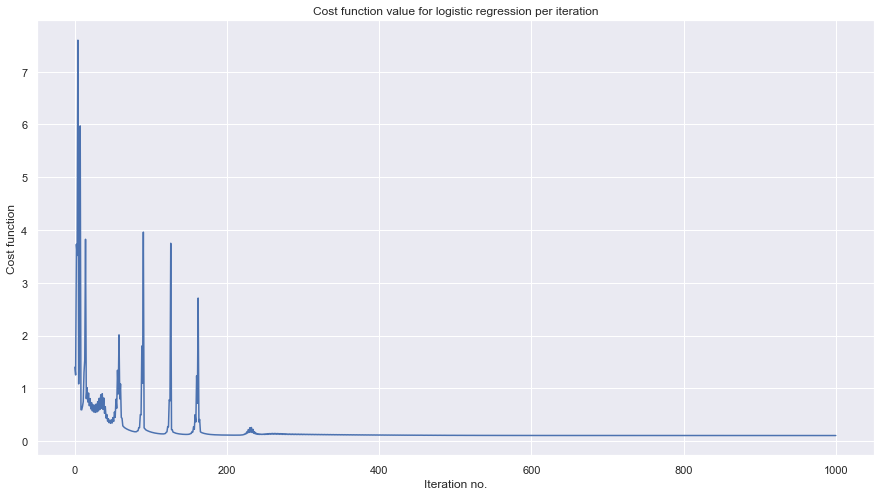

In [20]:
fig = sns.lineplot(y=CE_cost_history,x=range(len(CE_cost_history)))
fig.set(title="Cost function value for logistic regression per iteration")
fig.set(xlabel="Iteration no.")
fig.set(ylabel="Cost function")


In [21]:
#Calculate miscounts, but binarize with threshold of 0.5 instead
miscount_history = [miscount(weight,x,y,0.5) for weight in CE_w_history]

[Text(0, 0.5, 'Miscounts')]

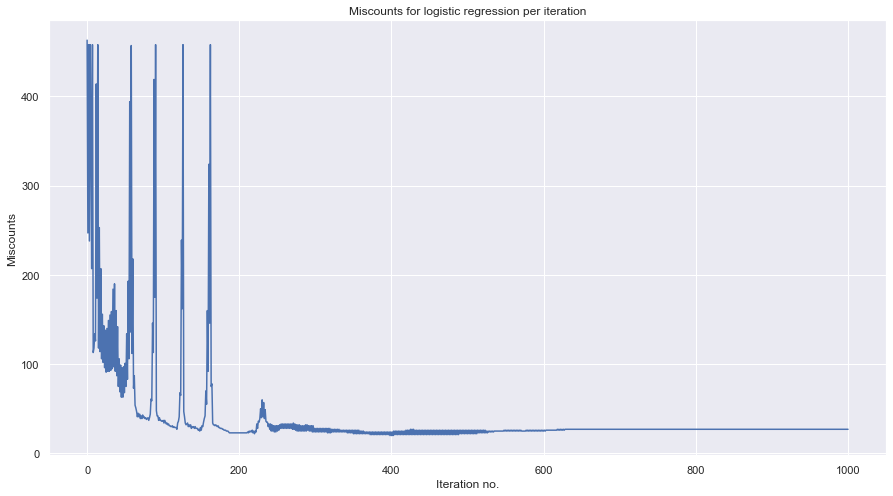

In [22]:
fig = sns.lineplot(y=miscount_history,x=range(len(miscount_history)))
fig.set(title="Miscounts for logistic regression per iteration")
fig.set(xlabel="Iteration no.")
fig.set(ylabel="Miscounts")


# Exercise 2

In [23]:
# standard normalization function - with nan checker / filler in-er
def standard_normalizer(x):    
    # compute the mean and standard deviation of the input
    x_means = np.nanmean(x,axis = 1)[:,np.newaxis]
    x_stds = np.nanstd(x,axis = 1)[:,np.newaxis]   

    # check to make sure that x_stds > small threshold, for those not
    # divide by 1 instead of original standard deviation
    ind = np.argwhere(x_stds < 10**(-2))
    if len(ind) > 0:
        ind = [v[0] for v in ind] # Just keep the row index
        adjust = np.zeros((x_stds.shape))
        adjust[ind] = 1.0
        x_stds += adjust

    # fill in any nan values with means 
    ind = np.argwhere(np.isnan(x) == True)
    for i in ind:
        x[i[0],i[1]] = x_means[i[0]]

    # create standard normalizer function
    normalizer = lambda data: (data - x_means)/x_stds

    # create inverse standard normalizer
    inverse_normalizer = lambda data: data*x_stds + x_means

    # return normalizer 
    return normalizer,inverse_normalizer

In [24]:
# data input
csvname = datapath + 'spambase_data.csv'
data = np.loadtxt(csvname,delimiter = ',')

# get input and output of dataset
x = data[:-1,:]
y = data[-1:,:] 
#Normalize data
normalizer,inverse_normalizer = standard_normalizer(x)
x = normalizer(x)
N = x.shape[0]
P = x.shape[1]

### 2.1

In [25]:
#Set iterations and w
max_its=1000
w=0.1*np.random.randn(N+1,1)

In [26]:
#Perceptron model fitting
perceptron_w_history,perceptron_cost_history=gradient_descent(perceptron,0.1,max_its,w)
miscount_perceptron_history = [miscount(weight,x,y,0) for weight in perceptron_w_history]

In [27]:
#Softmax model fitting
softmax_w_history,softmax_cost_history=gradient_descent(softmax,1.0,max_its,w)
miscount_softmax_history = [miscount(weight,x,y,0) for weight in softmax_w_history]

In [28]:
#Create data for dataframe
cost_histories=np.append(perceptron_cost_history,softmax_cost_history)
iter_no=[i for i in range(len(softmax_cost_history))]*2
function_type=np.repeat(['Perceptron','Softmax'],len(softmax_cost_history))
miscounts=np.append(miscount_perceptron_history,miscount_softmax_history)

#Build dataframe to help plot w/ seaborn
cost_history_df=pd.DataFrame([cost_histories,function_type,iter_no,miscounts]).T
cost_history_df.columns=['Cost Function Value','Function','Iteration no.','Miscounts']
cost_history_df["Cost Function Value"]=pd.to_numeric(cost_history_df["Cost Function Value"], downcast="float")
cost_history_df["Iteration no."]=pd.to_numeric(cost_history_df["Iteration no."], downcast="float")
cost_history_df["Miscounts"]=pd.to_numeric(cost_history_df["Miscounts"], downcast="float")


<AxesSubplot:xlabel='Iteration no.', ylabel='Cost Function Value'>

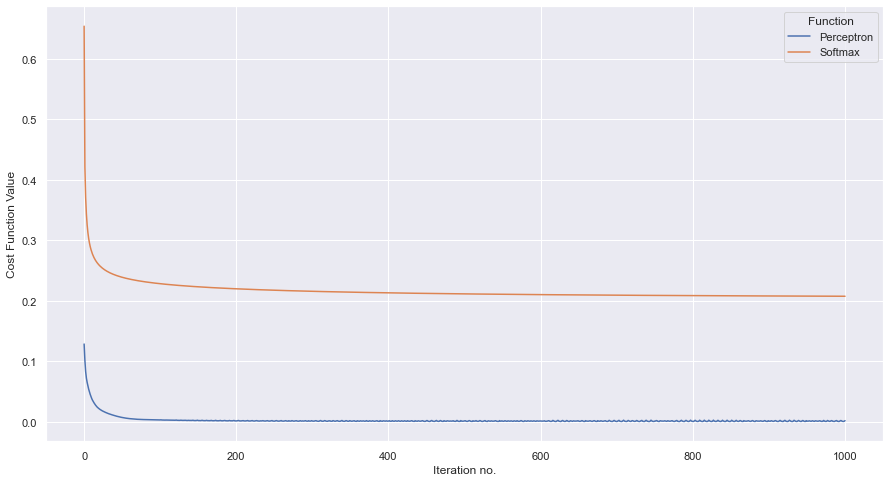

In [29]:
sns.lineplot(data=cost_history_df, x="Iteration no.", y="Cost Function Value", hue="Function")

The plot above shows the cost functions for the perceptron and softmax functions. This plot shows that both functions seemingly converged well onto local minima, and that the softmax cost function is higher than the perceptron cost function. 

<AxesSubplot:xlabel='Iteration no.', ylabel='Miscounts'>

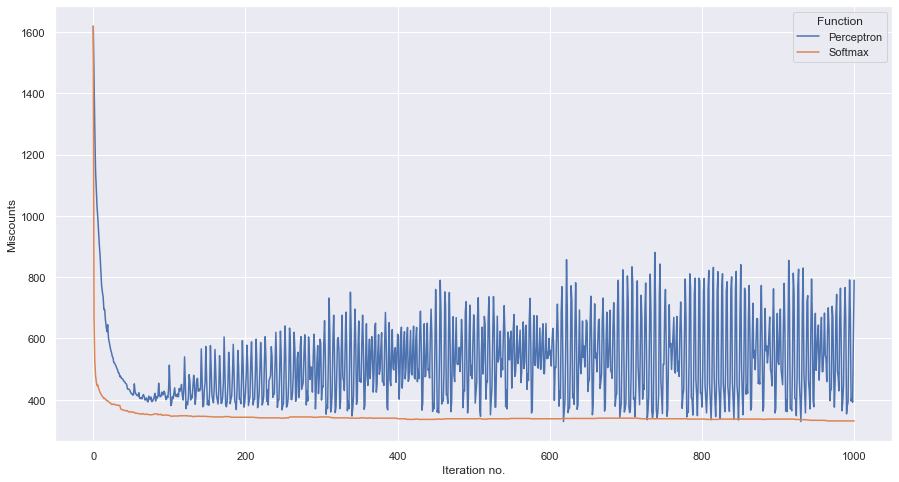

In [30]:
sns.lineplot(data=cost_history_df, x="Iteration no.", y="Miscounts", hue="Function")

The plot above shows the function miscounts for the perceptron and softmax functions. While the softmax function had a higher cost function in the earlier plot, it actually has fewer miscounts and more stable performance over time. As the number of iterations increase, the perceptron performance becomes increasingly unstable, and the number of miscounts seems to jump between iterations. One explanation for this is that the perceptron function has hit a very steep local minima, and therefore cannot converge well. As a result, a decreasing alpha may be more appropriate for the perceptron function.

### 2.2

In [31]:
best_softmax_w=softmax_w_history[np.argmin(miscount_softmax_history)]
best_perceptron_w=perceptron_w_history[np.argmin(miscount_perceptron_history)]

In [32]:
softmax_accuracy=1-miscount(best_softmax_w,x,y,0)/P
perceptron_accuracy=1-miscount(best_perceptron_w,x,y,0)/P

In [33]:
print('Perceptron Accuracy: '+str(perceptron_accuracy))

Perceptron Accuracy: 0.9284938056944143


In [34]:
print('Softmax Accuracy: '+str(softmax_accuracy))

Softmax Accuracy: 0.9280591175831341


The accuracy for both of these cost functions are virtually identical. This is interesting as it means that both models are equally able to fit to the data, despite the perceptron's unstable behaviour at later iterations of gradient descent

In [36]:
y_predict = model(x,best_softmax_w)>0
y_predict=y_predict.reshape(y_predict.size)
y_truth = y>0
y_truth=y_truth.reshape(y_truth.size)

Text(0.5, 1.0, 'Softmax Confusion Matrix')

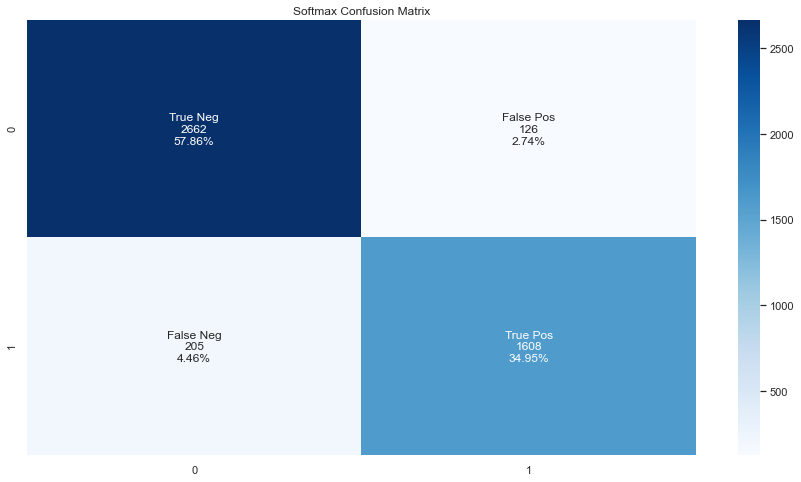

In [38]:
from sklearn.metrics import confusion_matrix
cf_matrix=confusion_matrix(y_truth,y_predict)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
fig=sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
fig.set_title("Softmax Confusion Matrix")

The above plot is the confusion matrix for the softmax function. The majority of cases are True negative and True Positive. Of the incorrectly predicted cases, there are more false negatives than false positives.

# Exercise 3

In [39]:
# load in dataset
csvname = datapath + 'credit_dataset.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = data[:-1,:]
y = data[-1:,:]

### 3.1

In [40]:
#Normalizing data
normalizer,inverse_normalizer = standard_normalizer(x)
x = normalizer(x)
N = x.shape[0]
P = x.shape[1]

### 3.2

In [41]:
#Fitting model
max_its=1000
w = 0.1*np.random.randn(N+1,1)
alpha = 0.1
perceptron_w_history,perceptron_cost_history=gradient_descent(perceptron,alpha,max_its,w)

<AxesSubplot:>

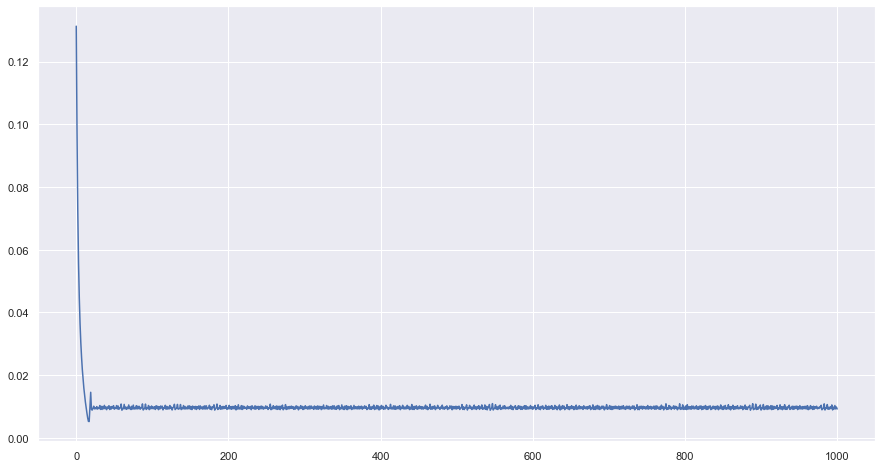

In [42]:
#Cost function plotting
sns.lineplot(data=perceptron_cost_history)

The above plot shows the cost history of the perceptron function. The minimum of the whole cost function history occurs at the 24th iteration, where there is a dip before the cost function converges and stabilizes around 0.01.

In [43]:
miscount_perceptron_history = [miscount(weight,x,y,0) for weight in perceptron_w_history]

<AxesSubplot:>

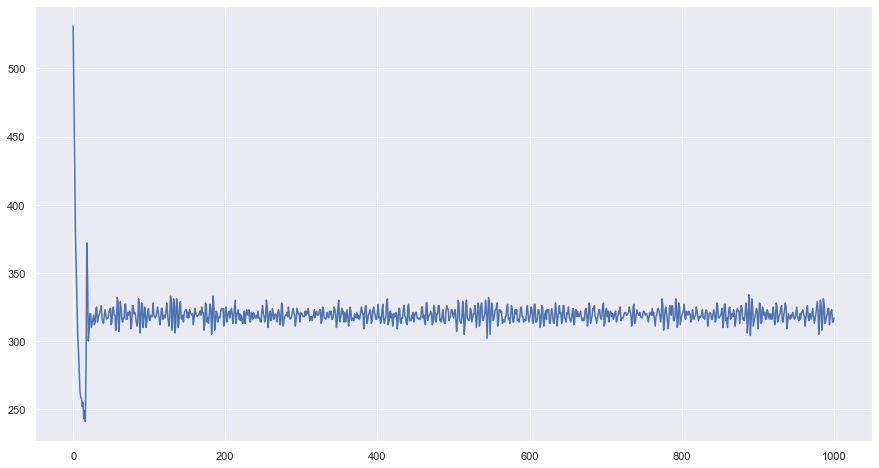

In [44]:
#Miscount Plotting
sns.lineplot(data=miscount_perceptron_history,)

The above plot shows the miscount history of the perceptron function. Similar to the cost function history, there is a significant drop in miscounts around the 24th iteration, before the amount of miscounts stabilizes and hovers near 320

In [45]:
#Get the best w and determine the accuracy
best_w=perceptron_w_history[np.argmin(miscount_perceptron_history)]
accuracy = 1-(miscount(best_w,x,y,0)/P)

In [46]:
accuracy

0.759

We are able to get the 75% accuracy obtained by the book

### 3.3

In [47]:
y_predict = model(x,best_w)>0
y_predict=y_predict.reshape(y_predict.size)
y_truth = y>0
y_truth=y_truth.reshape(y_truth.size)

In [48]:
from sklearn.metrics import confusion_matrix
cf_matrix=confusion_matrix(y_truth,y_predict)

In [49]:
TN=cf_matrix[0,0]
FP=cf_matrix[0,1]
FN=cf_matrix[1,0]
TP=cf_matrix[1,1]
sensitivity=TP/(TP+FN)
specificity=TN/(TN+FP)

Text(0.5, 1.0, 'Perceptron Confusion Matrix')

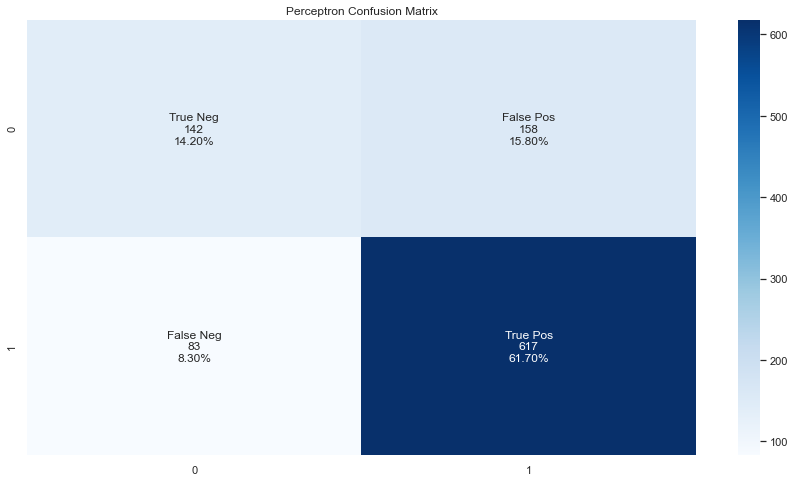

In [50]:

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
fig=sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
fig.set_title("Perceptron Confusion Matrix")

In [51]:
print('Specificity: '+str(specificity))
print('Sensitivity: '+str(sensitivity))

Specificity: 0.47333333333333333
Sensitivity: 0.8814285714285715


The above plot is the confusion matrix for the perceptron cost funcition on the credit rating dataset. The majority of incorrect predictions are due to false positives, as shown by a relatively low specificity of 51.3% compared to a sensitivity of 86.7%.

# Exercise 4

In [52]:
# compute C linear combinations of input point, one per classifier
def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T

lam = 10**-5  # our regularization paramter 
def multiclass_perceptron(w):        
    # pre-compute predictions on all points
    all_evals = model(x,w)
    
    # compute maximum across data points
    a = np.max(all_evals,axis = 0)    

    # compute cost in compact form using numpy broadcasting
    b = all_evals[y.astype(int).flatten(),np.arange(np.size(y))]
    cost = np.sum(a - b)
    
    # add regularizer
    cost = cost + lam*np.linalg.norm(w[1:,:],'fro')**2
    
    # return average
    return cost/float(np.size(y))

In [53]:
# load in dataset
data = np.loadtxt(datapath + '3class_data.csv',delimiter = ',')

# get input/output pairs
x = data[:-1,:]
y = data[-1:,:] 

In [54]:
#Fit model
w = 0.1*np.random.randn(3,3)
max_its=1000
alpha=0.1
multiclass_perceptron_w_history,multiclass_perceptron_cost_history=gradient_descent(multiclass_perceptron,alpha,max_its,w)

<AxesSubplot:>

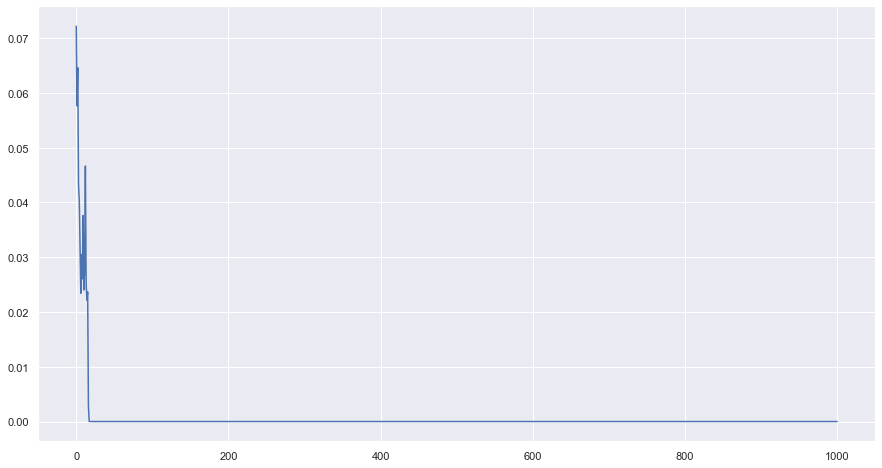

In [55]:
sns.lineplot(data=multiclass_perceptron_cost_history)

The above plot is the cost function history of the multi-class perceptron. The model achieves a very good performance, converging on near 0 cost function values after 30 iterations. 

In [58]:
df = pd.DataFrame(data).T
df.columns=['X1','X2','Class']
df['Class']=df['Class'].astype(int)
df['Class']=df['Class'].astype(str)

In [61]:
#Selecting best model and plotting decision boundaries for 
best_w=multiclass_perceptron_w_history[np.argmin(multiclass_perceptron_cost_history)]
x1_min, x1_max = df['X1'].min() -1 , df['X1'].max() + 1
x2_min, x2_max = df['X2'].min() - 1, df['X2'].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.0005), np.arange(x2_min, x2_max, 0.0005)) #Simulate a grid of all possible x1/x2 values
outputs = model(np.c_[xx1.ravel(), xx2.ravel()].T,best_w).T 
class_predictions = np.argmax(outputs,axis=1)
class_predictions=class_predictions.reshape(xx1.shape) #Get the class for simulated values




Text(0, 0.5, 'X2')

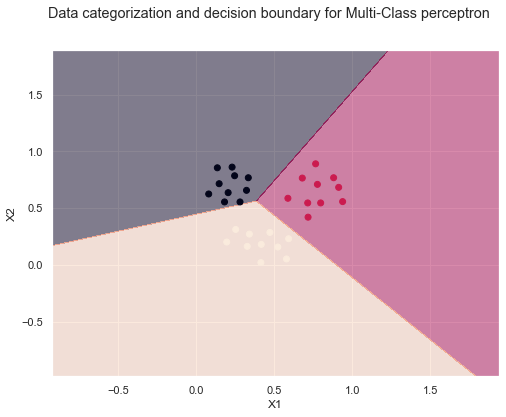

In [62]:
plt.figure(figsize=(8,6))
plt.contourf(xx1, xx2, class_predictions, alpha=0.5)
scatter = plt.scatter(df['X1'],df['X2'],c=y)
plt.suptitle("Data categorization and decision boundary for Multi-Class perceptron")
plt.xlabel("X1")
plt.ylabel("X2")

Above is the decision boundary plot for the multi-class perceptron model. The model accurately classifies all data points correctly, and looks to be fitting well.